In [330]:
import pandas as pd
import itertools
from collections import defaultdict
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [343]:
months = list(range(3, 9))
buffers = [20, 10]
sheet_names = [f"{buffer}km-{str(month).zfill(2)}" for buffer, month in itertools.product(buffers, months)]
data_file = "Data-All.xlsx"
sheet_name = ""

dfs = []
for buffer in buffers:
    for month in months:
        sheet_name = f"{buffer}km-{str(month).zfill(2)}"
        df = pd.read_excel("Data-All.xlsx", sheet_name=sheet_name, index_col="RecordID")
        df["buffer"] = buffer
        df["month"] = month
        dfs.append(df)

In [446]:
df = pd.concat(dfs)

In [447]:
weird_year_cols = [x for x in df if x.startswith("2003") or x.startswith("2004")]
df = df[df.columns.difference(weird_year_cols)]
df["RecordID"] = df.index
df

,03_max,03_mean,03_median,03_min,03_stdev,04_max,04_mean,04_median,04_min,04_stdev,...,21_min,21_stdev,Country,County,LAT,LONG,_10min,buffer,month,RecordID
RecordID,,,,,,,,,,,,,,,,,,,,,
19105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.595000,0.208461,Scotland,Shetland,60.704667,-1.135347,NaN,20,3,19105
19082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.595000,0.204145,Scotland,Shetland,60.687776,-1.133603,NaN,20,3,19082
19055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.595000,0.253720,Scotland,Shetland,60.728291,-1.122979,NaN,20,3,19055
19077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.595000,0.231437,Scotland,Shetland,60.719196,-1.119011,NaN,20,3,19077
19090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.595000,0.253720,Scotland,Shetland,60.737128,-1.115219,NaN,20,3,19090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602,16.730000,15.459615,15.1950,14.495,0.714544,16.475,15.112051,15.040000,14.535,0.408026,...,14.380000,0.266641,England,Humberside,54.133544,-0.118972,NaN,10,8,4602
4630,16.730000,15.392307,15.1150,14.495,0.703991,16.475,15.131923,15.059999,14.535,0.403689,...,14.380000,0.267917,England,Humberside,54.130804,-0.104709,NaN,10,8,4630
4539,16.914999,15.430375,15.1375,14.495,0.734663,16.475,15.128125,15.050000,14.535,0.399316,...,14.380000,0.281282,England,Humberside,54.127862,-0.094895,NaN,10,8,4539


In [448]:
melted = []
keys = ["mean", "median", "stdev", "min", "max"]
for key in keys:
    columns = sorted([x for x in df.columns if x.endswith(f"_{key}")])
    tmp = pd.melt(
        df, 
        id_vars=["RecordID", "Country", "County", "LAT", "LONG", "month", "buffer"], 
        value_vars=columns, # list of days of the week
        var_name="variable", 
        value_name=key
    )
    tmp["year"] = tmp["variable"].str[:2].astype(int)
    tmp = tmp.drop("variable", axis=1)
    melted.append(tmp.set_index(["RecordID", "month", "year"]))

In [449]:
tmp = melted[0]
for key, df_ in zip(keys[1:], melted[1:]):
    tmp[key] = df_[key]

In [450]:
df = tmp.dropna()

In [451]:
df

,,,Country,County,LAT,LONG,buffer,mean,median,stdev,min,max
RecordID,month,year,,,,,,,,,,
19105,4,3,Scotland,Shetland,60.704667,-1.135347,20,8.768276,8.745000,0.201299,8.360000,9.080000
19082,4,3,Scotland,Shetland,60.687776,-1.133603,20,8.757143,8.737500,0.195893,8.360000,9.075000
19055,4,3,Scotland,Shetland,60.728291,-1.122979,20,8.842105,8.905000,0.223535,8.360000,9.170000
19077,4,3,Scotland,Shetland,60.719196,-1.119011,20,8.820000,8.875000,0.217568,8.360000,9.125000
19090,4,3,Scotland,Shetland,60.737128,-1.115219,20,8.842105,8.905000,0.223535,8.360000,9.170000
...,...,...,...,...,...,...,...,...,...,...,...,...
4602,8,21,England,Humberside,54.133544,-0.118972,10,15.102179,15.099999,0.266641,14.380000,15.684999
4630,8,21,England,Humberside,54.130804,-0.104709,10,15.097820,15.099999,0.267917,14.380000,15.684999
4539,8,21,England,Humberside,54.127862,-0.094895,10,15.113125,15.102499,0.281282,14.380000,15.710000


In [380]:
df.describe()

,LAT,LONG,mean,median,stdev,min,max
count,90972.000000,90972.000000,90170.000000,90170.000000,89372.000000,89372.000000,90170.000000
mean,57.917775,-3.400232,10.583388,10.576218,0.264716,10.021617,11.127153
std,2.708028,2.422166,2.696972,2.690519,0.195962,2.605805,2.886102
min,49.866969,-8.634826,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.856558,-4.887004,8.287096,8.290000,0.143944,7.880000,8.679999
50%,58.598328,-3.021019,10.408030,10.396250,0.217598,9.815000,10.980000
75%,60.102660,-1.315362,12.757581,12.737500,0.329648,12.145000,13.395000
max,60.840151,-0.077642,26.599998,26.599998,6.983477,26.599998,29.264999


In [426]:
df.groupby(["LONG", "LAT", "year"]).mean().reset_index()

,LONG,LAT,year,mean,median,stdev,min,max
0,-8.634826,57.828738,3,12.181277,12.161364,0.203547,11.740000,12.562272
1,-8.634826,57.828738,4,11.875008,11.895909,0.211119,11.361363,12.285909
2,-8.634826,57.828738,5,10.986658,10.970833,0.217082,10.489583,11.429166
3,-8.634826,57.828738,6,11.261037,11.261458,0.198955,10.774583,11.712083
4,-8.634826,57.828738,7,11.614321,11.596666,0.192852,11.161250,12.056250
...,...,...,...,...,...,...,...,...
6778,-0.077642,54.113745,17,11.531869,11.506041,0.284208,10.976250,12.321666
6779,-0.077642,54.113745,18,10.681340,10.664375,0.349924,10.027500,11.517916
6780,-0.077642,54.113745,19,11.592593,11.592708,0.300606,10.595909,12.292500
6781,-0.077642,54.113745,20,11.384414,11.349583,0.342399,10.597500,12.396667


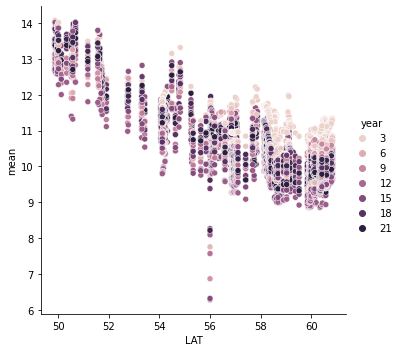

In [421]:
sns.relplot(data=df.groupby(["LONG", "LAT", "year"]).mean().reset_index(), x="LAT", y="mean", hue="year")

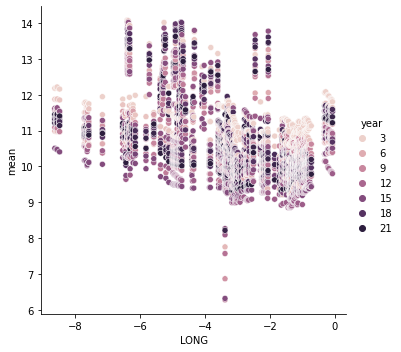

In [405]:
sns.relplot(data=df.groupby(["LONG", "year"]).mean().reset_index(), x="LONG", y="mean", hue="year")

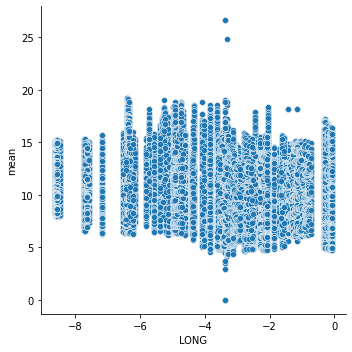

In [439]:
sns.relplot(data=df, x="LONG", y="mean")

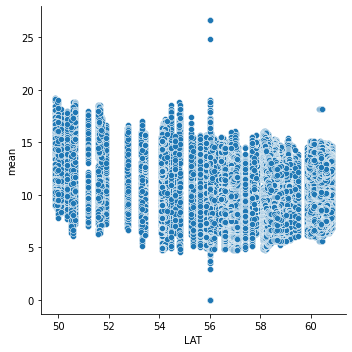

In [440]:
sns.relplot(data=df, x="LAT", y="mean")

In [430]:
df[["LAT", "LONG", "mean"]].corr()

,LAT,LONG,mean
LAT,1.000000,0.413405,-0.270736
LONG,0.413405,1.000000,-0.184470
mean,-0.270736,-0.184470,1.000000


In [456]:
df.groupby(["buffer"]).mean()

,LAT,LONG,mean,median,stdev,min,max
buffer,,,,,,,
10,57.917775,-3.400232,10.397162,10.393568,0.264476,9.849337,10.930913
20,57.917950,-3.400233,10.697890,10.687139,0.263619,10.158491,11.249468


<AxesSubplot:xlabel='LONG', ylabel='mean'>

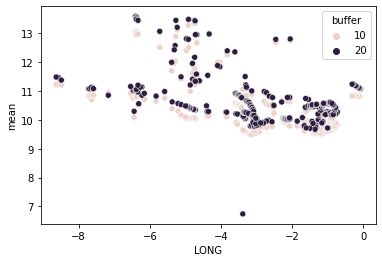

In [455]:
sns.scatterplot(data=df.groupby(["buffer", "LAT"]).mean(), x="LONG", y="mean", hue="buffer")

<AxesSubplot:xlabel='month', ylabel='mean'>

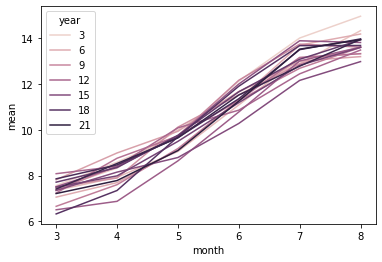

In [465]:
sns.lineplot(data=df.groupby(["year", "month"]).mean(), x="month", y="mean", hue="year")